# Macro economics and inflation

Espen Sirnes  
2025-03-24

# Basic Macroeconomics

To lay a foundation for inflation forecasting, we begin by revisiting
the essential frameworks from a typical introductory macroeconomics
course. Models such as the Aggregate Demand–Aggregate Supply (AD–AS)
framework, the Phillips Curve, and the IS–LM model illustrate how key
variables—output, employment, interest rates, and monetary
policy—interact to influence the overall price level. These fundamental
relationships form the basis for more sophisticated approaches to
predicting inflation. By understanding how economic activity (demand)
and production capacity (supply) jointly determine prices, we can better
identify and anticipate the pressures that drive inflation within an
economy.

## Investment, Central Bank Interest Rates, and Inflation

In any economy, firms typically finance new projects and investments
through borrowing. The cost of borrowing depends on the prevailing
interest rate. When interest rates are low, the cost of capital is
cheaper, and firms become more inclined to invest in equipment,
infrastructure, and research. As a result, aggregate demand may increase
because investment is a key component of total spending. Conversely,
when interest rates rise, borrowing becomes more expensive, firms reduce
their investments, and the pace of economic activity can slow.

Central banks, such as the Federal Reserve, the European Central Bank
and Norges Bank, play a central role in determining these interest rates
through their policy decisions. By setting a target policy rate, they
influence the broader range of interest rates in the economy, including
commercial and mortgage rates. Typically, a central bank will raise the
policy rate in response to higher inflation or inflationary pressures
with the goal of tempering aggregate demand and moderating price
increases. On the other hand, lowering the policy rate is often intended
to stimulate borrowing and spending, which can boost aggregate demand
and potentially push inflation higher if economic activity exceeds the
productive capacity of the economy.

One way to visualize these relationships is via a simplified “IS curve”
(Investment–Savings) and a horizontal policy rate line in interest
rate–output space, see upper right model in
<a href="#fig-keynes" class="quarto-xref">Figure 1</a>. The IS curve
slopes downward because Hicks (1937), at lower interest rates, aggregate
demand (particularly investment spending) tends to be higher, thus
increasing output. However, if the central bank sets a particular policy
rate and commits to maintaining it, that rate appears as a horizontal
line on the same diagram.

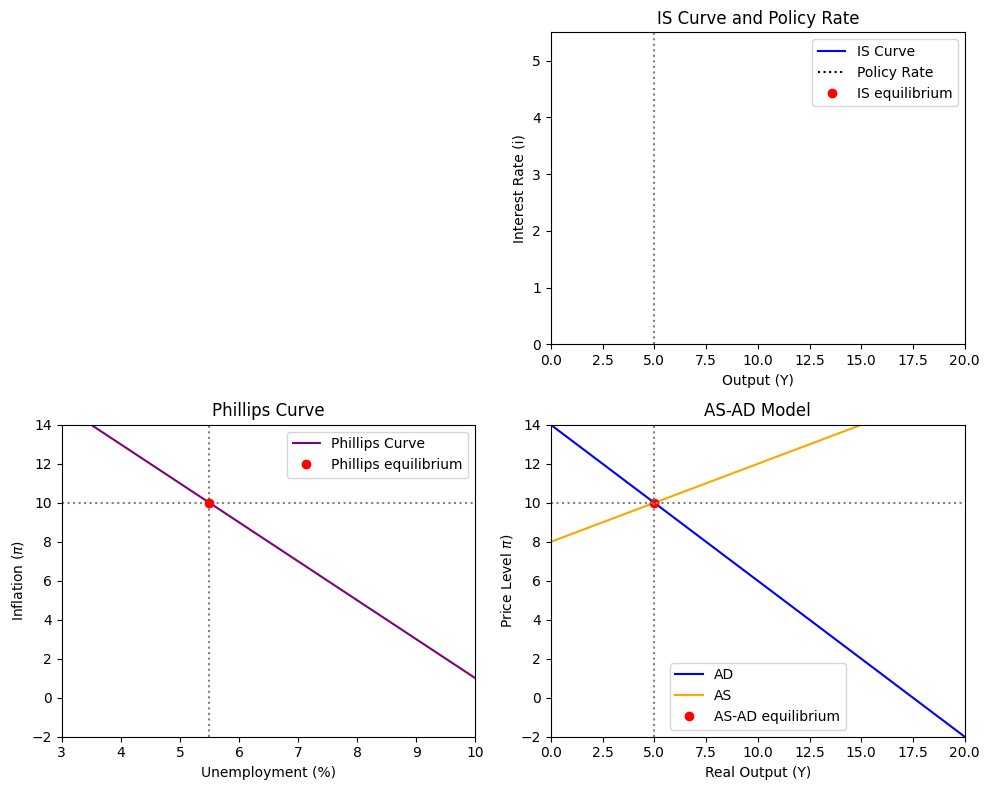

In [4]:
import numpy as np
import matplotlib.pyplot as plt


#Main parameters:

model = 1

if model == 0:
    # CB signal driven economy
    i_policy = 2.0
    Inflation_expectations = 2 + 2*i_policy

else:
    # CB transparent inflation targeting economy
    Inflation_expectations = 10
    i_policy = 1 + (Inflation_expectations-2)


# Common output range
Y = np.linspace(0, 20, 200)
# Phillips curve parameters


U = np.linspace(3, 10, 200)
U_eq = 5.5
slope = -2
P_phillips = Inflation_expectations + slope * (U - U_eq)


# AS-AD curve parameters
a_AD = 14
b_AD = 0.8
d_AS = 0.4

Y_star = (a_AD - Inflation_expectations) / b_AD
P_AD = a_AD - b_AD * Y
c_AS = Inflation_expectations - d_AS * Y_star

P_AS = c_AS + d_AS * Y
Y_eq = (a_AD - c_AS) / (b_AD + d_AS)
P_eq = a_AD - b_AD * Y_eq

# IS curve parameters
b_is = 0.2
a_is = a_is = i_policy + b_is * Y_star
i_IS = a_is - b_is * Y



# Create unified 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top left: (empty)
axs[0, 0].axis('off')

# Top right: IS curve
ax_is = axs[0, 1]
ax_is.plot(Y, i_IS, label='IS Curve', color='blue')
ax_is.axhline(y=i_policy, color='black', linestyle=':', label='Policy Rate')
ax_is.axvline(x=Y_star, linestyle=':', color='gray')
ax_is.plot(Y_star, i_policy, 'ro', label='IS equilibrium')  # equilibrium point
ax_is.set_xlabel('Output (Y)')
ax_is.set_ylabel('Interest Rate (i)')
ax_is.set_title('IS Curve and Policy Rate')
ax_is.legend()


# Bottom left: Phillips curve
ax_phillips = axs[1, 0]
ax_phillips.plot(U, P_phillips, color='purple', label='Phillips Curve')
ax_phillips.axhline(y=P_eq, linestyle=':', color='gray')
ax_phillips.axvline(x=U_eq, linestyle=':', color='gray')
ax_phillips.plot(U_eq, P_eq, 'ro', label='Phillips equilibrium')
ax_phillips.set_xlabel('Unemployment (%)')
ax_phillips.set_ylabel(r'Inflation ($\pi$)')
ax_phillips.set_title('Phillips Curve')
ax_phillips.legend()


# Bottom right: AS-AD model
ax_asad = axs[1, 1]
ax_asad.plot(Y, P_AD, label="AD", color='blue')
ax_asad.plot(Y, P_AS, label="AS", color='orange')
ax_asad.plot(Y_eq, P_eq, 'ro', label='AS-AD equilibrium')
ax_asad.axhline(y=P_eq, linestyle=':', color='gray')
ax_asad.axvline(x=Y_star, linestyle=':', color='gray')
ax_asad.set_xlabel('Real Output (Y)')
ax_asad.set_ylabel(r'Price Level $\pi$)')
ax_asad.set_title('AS-AD Model')
ax_asad.legend()

# Setting axes
ax_is.set_ylim([0, 5.5])
ax_is.set_xlim([0, 20])

ax_asad.set_ylim([-2, 14])
ax_asad.set_xlim([0, 20])

ax_phillips.set_ylim([-2, 14])
ax_phillips.set_xlim([3, 10])

# Match y-limits for Phillips and AS-AD plots
ax_phillips.set_ylim(ax_asad.get_ylim())

plt.tight_layout()
plt.show()

In this graph, the downward-sloping line labeled “IS Curve” shows how
lower interest rates tend to be associated with higher levels of output,
reflecting stronger investment spending. The dashed horizontal line
labeled “Policy Rate” represents the central bank’s chosen interest
rate. If the central bank firmly anchors the interest rate at this
level, the actual market interest rate will not necessarily follow the
IS line at every point, depending on how credit markets and monetary
policy transmission mechanisms operate. Nonetheless, this stylized
depiction helps illustrate how the central bank’s actions influence the
cost of borrowing and, consequently, investment decisions and overall
economic activity.

## Real and Nominal Interest Rates

The distinction between nominal and real interest rates is central to
understanding economic behavior, particularly when forecasting
inflation. The **nominal interest rate** is the stated rate on a loan or
financial asset, unadjusted for inflation. For example, if a savings
account offers a return of 5% per year, this figure represents the
nominal interest rate.

However, what truly matters for economic decisions—especially for
borrowers and investors—is the **real interest rate**, which accounts
for changes in the price level. The real interest rate reflects the true
cost of borrowing and the true return on savings, once inflation is
taken into consideration. A commonly used approximation for the real
interest rate is:

<span id="eq-fisher_equation">$$
r \approx i - \pi
 \qquad(1)$$</span>

where $r$ is the real interest rate, $i$ is the nominal interest rate,
and $\pi$ is the inflation rate. This is called the Fisher equation. If
returns are calcualted as log change, the equation holds with strict
equality.

This relationship implies that if inflation rises while the nominal
interest rate remains unchanged, the real interest rate falls. In such a
case, the burden of debt repayment becomes lighter in real terms,
potentially encouraging more borrowing and spending. For instance, if
the nominal interest rate is 5% but inflation is 4%, the real interest
rate is only about 1%. Thus, even a seemingly high nominal rate may
correspond to a very low—or even negative—real rate when inflation is
taken into account. This dynamic plays a crucial role in the
transmission of monetary policy and is a key consideration when
forecasting inflation and its broader economic effects.

In <a href="#fig-keynes" class="quarto-xref">Figure 1</a>, the top right
panel shows the IS curve, where the nominal interest rate is used as the
policy instrument. For this to influence investment decisions—as assumed
in the IS framework—it must effectively shift the real interest rate.
This requires expected inflation to remain stable, so that changes in
the nominal rate translate directly into changes in the real rate. Such
an assumption is only reasonable if the central bank has a credible and
transparent monetary policy, allowing inflation expectations to remain
anchored in the short run.

## Aggregate Supply (AS) and Aggregate Demand (AD)

Aggregate demand (AD) represents the total demand for goods and services
in the economy at various price levels. It reflects the combined
spending of households (consumption), firms (investment), the
government, and the foreign sector (net exports). It is illustrated in
the bottom right corver of
<a href="#fig-keynes" class="quarto-xref">Figure 1</a>.

The AD curve is typically downward-sloping: as the price level falls,
the quantity of goods and services demanded increases. This is due to
several mechanisms, including wealth effects, interest rate effects, and
exchange rate effects that influence behavior as prices change.

When aggregate demand increases rapidly—due to expansionary fiscal
policy, accommodative monetary policy, or a surge in private sector
confidence—it can outpace the economy’s productive capacity. In such
cases, inflationary pressures may build as too much money chases too few
goods. This situation is commonly referred to as demand-pull inflation.

Aggregate supply (AS), by contrast, captures the total output that firms
are willing and able to produce at different price levels. In the short
run, the AS curve typically slopes upward due to price rigidities such
as sticky wages, contracts, and adjustment costs. However, in the long
run, the AS curve becomes vertical at the level of potential output,
representing the economy’s full capacity based on available resources
and technology.

The interaction between aggregate demand and supply determines the
equilibrium price level and real output in the economy. When aggregate
demand increases in an economy already operating near full capacity, the
price level tends to rise more than output, generating inflation.
Alternatively, shifts in aggregate supply—such as a surge in commodity
prices or disruptions to global supply chains—can lead to cost-push
inflation. Positive supply-side developments, such as improved
productivity or input cost reductions, can ease inflationary pressures.

## The Phillips Curve

The Phillips curve (Phillips (1958)), shown in the bottom left panel of
<a href="#fig-keynes" class="quarto-xref">Figure 1</a>, illustrates the
inverse relationship between inflation and unemployment in the short
run. This relationship captures the idea that when unemployment is
low—indicating a tight labor market—inflation tends to rise due to
increased wage pressures. Conversely, when unemployment is high,
inflationary pressures tend to subside.

The version shown in the figure is an expectations-augmented Phillips
curve, where the curve is anchored at a given level of expected
inflation. As such, the vertical location of the curve reflects the
public’s inflation expectations, often influenced by monetary policy
credibility. If expectations rise, the entire curve shifts upward,
implying higher inflation at every level of unemployment. Conversely,
when expectations fall, the curve shifts downward.

In the broader model context, the Phillips curve plays a crucial role in
explaining how inflation expectations feed into short-run aggregate
supply behavior. It provides a micro-founded mechanism for the upward or
downward shifts of the AS curve, linking labor market conditions
directly to inflation dynamics.

## Putting it all together

It is now time to bring all the components together by considering the
full model setup illustrated in
<a href="#fig-keynes" class="quarto-xref">Figure 1</a>. As the
calculations demonstrate, we can distinguish between two conceptually
different regimes for central bank behavior. In the first model—where
the public looks to the central bank as a signal of future inflation
rather than a stabilizing force—expectations are less firmly anchored.
Inflation expectations tend to rise when the nominal interest rate
rises, not because policy is restraining inflation, but because higher
rates are interpreted as signals of future inflation. In this scenario,
the AS curve shifts upward when the policy rate increases, and higher
inflation is only consistent with higher output if the IS curve also
shifts. This model reflects economies where monetary policy lacks
credibility or where communication is weak, and expectations are formed
in an extrapolative or adaptive fashion.

In contrast, the “transparent inflation-targeting economy” reflects a
policy environment grounded in a systematic response to inflation
expectations—most prominently captured by the Taylor Rule (Taylor
(1993)). Here, the central bank raises the policy rate when inflation is
expected to rise and lowers it when inflation is expected to fall, in an
effort to stabilize both inflation and output. In this regime, inflation
expectations are anchored and act as a stabilizing force: the AS curve
is pinned at the expected inflation rate, and the IS curve adjusts
through the interest rate channel to restore equilibrium. This model
corresponds to how most modern central banks describe their policy
frameworks and is highly relevant for inflation forecasting.

For students engaged in forecasting inflation or interest rates,
understanding these two regimes can be helpful. In the signal-driven
regime — not commonly formalized in the academic literature — inflation
expectations are endogenously shaped by movements in the policy rate.
This makes it challenging to disentangle cause and effect, as interest
rate changes may reflect shifts in sentiment rather than deliberate
policy responses. By contrast, in the transparent inflation-targeting
regime, interest rates operate as a systematic reaction function to
deviations in inflation and output from their targets. This structure
makes policy rates more predictable based on observable macroeconomic
data and policy rules, such as the Taylor rule. Identifying which regime
best characterizes the economy under study is therefore a critical
judgment, as it shapes both model choice and the interpretation of
forecasts.

# Estimating Future Inflation

Having explored the macroeconomic foundations of inflation, we now turn
to the question of how inflation can be forecasted using empirical
models. The central challenge is to identify economic variables that
reliably predict future price movements. This section traces a key
strand of the academic literature, beginning with early work on interest
rates as predictors of inflation and moving toward more modern
perspectives that confront the evolving complexity of the inflation
process.

## Conventional Macroeconomic Models and the Phillips Curve Tradition

A natural starting point in the empirical modeling of inflation is to
turn to conventional macroeconomic variables grounded in the IS–AD–AS
framework. These models emphasize the relationship between inflation and
the overall state of the economy, particularly measures of real activity
such as output, unemployment, and capacity utilization. The central idea
is intuitive: when the economy is operating above its potential—due to
strong demand—prices tend to rise more rapidly, while economic slack is
typically associated with lower inflation or even deflation.

The most well-known operationalization of this framework is the Phillips
curve, which relates inflation to the unemployment rate or, more
precisely, to the deviation of unemployment from its natural rate. This
relationship has a long empirical history and remains a core component
in many policy models used by central banks and forecasting
institutions. A prominent example is Gordon (1997) “triangle model” of
inflation, which decomposes inflation dynamics into three components:
inertia (past inflation), demand pressure (as proxied by the
unemployment gap), and supply shocks (such as changes in commodity
prices or exchange rates). This approach aligns with the idea that
inflation is influenced by both real activity and cost-push factors, and
it reflects the theoretical logic of the AD–AS framework in a
reduced-form regression.

Several influential studies have shaped the use of traditional
macroeconomic indicators in the empirical forecasting of inflation.
Gordon (1982) early work laid the foundation for the so-called triangle
model, which decomposes inflation into three components: inertia (past
inflation), demand pressures (proxied by the unemployment gap), and
supply shocks (such as oil prices). This framework became a mainstay in
forecasting exercises that aim to account for both nominal rigidities
and structural sources of inflation variation. Fuhrer (1995) further
contributed to the validation of this approach, showing that Phillips
curve models incorporating both lagged inflation and real activity
measures remain empirically robust and useful for short- to medium-term
forecasts. Building on these ideas within a New Keynesian framework,
Roberts (1995) and Roberts (1997) estimated hybrid Phillips curves that
allow for both backward-looking and forward-looking behavior. His
findings demonstrate that output gaps and inflation expectations
together provide meaningful predictive content, especially in models
that account for sticky prices and staggered wage setting. Together,
these studies form the empirical backbone of a broad class of inflation
forecasting models that link real economic conditions to future
inflation in a structured and interpretable way. Although their
performance can vary depending on the macroeconomic environment, these
models continue to serve as benchmarks in academic and policy settings.

## Has inflation become harder to forcast?

As empirical methods improved and longer datasets became available, the
question arose as to whether inflation itself had become more difficult
to forecast over time. This is the question taken up by Stock and Watson
(2007) In a careful empirical analysis, Stock and Watson show that the
performance of standard forecasting models—such as autoregressive models
or those based on Phillips curve relationships—deteriorated
substantially starting in the mid-1980s. Their results suggest that
inflation had become less persistent, and that traditional indicators,
such as the unemployment rate or the output gap, had lost much of their
explanatory power.

Stock and Watson identify three key developments behind this decline in
forecast accuracy.

-   First, inflation persistence has decreased, meaning that past
    inflation rates no longer provide as much information about future
    values.

-   Second, structural relationships, such as the link between inflation
    and economic slack, appear to have weakened or changed, reducing the
    predictive power of models grounded in earlier macroeconomic theory.

-   Third, the influence of stochastic volatility—random, unpredictable
    shocks—has increased, making inflation more sensitive to factors
    that models cannot easily capture.

## Famas test of market efficiency

A foundational contribution came from Fama (1975), who proposed that
nominal interest rates, particularly short-term rates, might serve as
unbiased forecasts of future inflation. The theoretical foundation of
this claim lies in the Fisher equation
<a href="#eq-fisher_equation" class="quarto-xref">Equation 1</a>, which
decomposes nominal interest rates into a real interest rate component
and expected inflation. If real interest rates are constant or at least
predictable, then variations in nominal rates should largely reflect
movements in expected inflation. That is, he effectively tests a version
of the Fisher equaiton
<a href="#eq-fisher_equation" class="quarto-xref">Equation 1</a>:

$$
(-\pi_t)=a_0 + a_1 \cdot i_t + a_2 \cdot (-\pi_{t-1}) + \epsilon_t
$$

If you wonder why the uses the negative of the inflation $(-\pi_t)$,
don’t ask. $i_t$ is the t-bill nominal interest rate.

Using U.S. data from periods of high and volatile inflation, Fama
empirically tested the hypothesis and found that short-term nominal
interest rates did, in fact, contain information about contemporaneous
inflation. Moreover, lagged inflation appeared to add little explanatory
power: the coefficient on past inflation, $a_2$, was not significantly
different from zero. This result supports the view that the interest
rate market incorporates available information efficiently, making
nominal rates a relatively unbiased measure of expected inflation during
this period.

In some specifications, the nominal interest rate even behaved like
unbiased predictors. This suggested that financial markets, by pricing
interest-bearing instruments, could anticipate future inflation. His
findings stimulated a large literature that sought to explore and refine
the idea that market-based interest rates might encode forward-looking
information about the macroeconomy.

## Are real interest rates really constant?

However, a crucial assumption in Fama’s framework — that real interest
rates are constant over time — soon became the subject of critique.
Nelson and Schwert (1977) responded directly to this issue. They tested
the constancy of real interest rates by subtracting actual inflation
from observed nominal rates and examining the resulting series,
i.e. simply calcuating the ralized real return using
<a href="#eq-fisher_equation" class="quarto-xref">Equation 1</a>.

They then tested if the real return was in fact contstant, by checking
its autocorrelation. They found theere was in deed time dependnce, and
hence, real returns are not constants, undermining the assumption that
nominal rates could be interpreted as clean signals of inflation
expectations.

The implications of Nelson and Schwert’s findings were far-reaching. If
real interest rates fluctuate, then movements in nominal interest rates
could reflect changes in both the real and expected inflation
components, making it harder to isolate expectations. Their work shifted
the focus in the literature toward more sophisticated empirical
strategies, including models that treated both expected inflation and
real rates as jointly stochastic processes. This shift called for
multivariate models or state-space methods that could capture the latent
dynamics underlying interest rates and inflation simultaneously.

## Time Series Forecasting: ARIMA and GARCH Models

A substantial body of empirical work has examined the performance of
time series models such as ARIMA and GARCH in forecasting inflation.
These models are particularly useful in capturing the persistence and
volatility clustering often observed in inflation data, and have long
served as benchmarks in the inflation forecasting literature.

Stock and Watson (2007) in their broader comparison of inflation models,
include univariate ARIMA-type forecasts and find that although these
models perform reasonably well, their accuracy deteriorated
significantly after the mid-1980s. They argue that the decline in
inflation persistence — a stylized fact of the post-Volcker disinflation
era — reduces the predictive power of such backward-looking models. This
finding highlights a broader pattern: ARIMA models can be effective when
inflation follows stable statistical properties but perform poorly in
the presence of structural breaks or shifts in the inflation process.

Other studies have incorporated GARCH-type volatility modeling to
account for time-varying uncertainty in inflation. The ARCH and GARCH
models introduced by Engle and Bollerslev (1986) were originally
developed for modeling financial volatility, but subsequent research
extended their application to macroeconomic time series, including
inflation. In empirical work, GARCH specifications are often used to
model inflation uncertainty and to generate density forecasts, capturing
not only the expected path of inflation but also the confidence bands
around it.

For example, Brunner and Hess (1993) apply GARCH models to U.S. CPI
inflation and find strong evidence of volatility clustering,
particularly during periods of monetary regime change. Their results
suggest that modeling conditional heteroskedasticity can improve the
accuracy of forecast intervals, even though it has limited effect on
point forecasts. These findings underscore the importance of capturing
time-varying uncertainty in inflation models, especially for
risk-sensitive applications such as monetary policy and bond pricing.

Although GARCH models have proven valuable in capturing inflation
uncertainty, the field has matured over the past two decades. Most of
the foundational insights about volatility clustering and conditional
variance were established in the 1990s, and more recent published work
has largely applied established models rather than developing
fundamentally new frameworks. As a result, the use of ARCH/GARCH in
inflation forecasting is now considered a standard tool — one that still
holds value but no longer sits at the frontier of research, so studies
on this are rarely published.

In sum, ARIMA and GARCH models provide a flexible, data-driven way to
forecast inflation and its associated volatility. While their strength
lies in capturing autoregressive patterns and conditional
heteroskedasticity, their performance is sensitive to changes in the
underlying inflation process. As such, their role is often complementary
to structural and expectation-based models, particularly in environments
with relatively stable inflation dynamics.

## Using Dynamic Stochastic General Equilibrium (DSGE) models for predicting inflation

No survey of modern inflation modeling would be complete without
acknowledging the role of Dynamic Stochastic General Equilibrium (DSGE)
models. These models represent the most theoretically rigorous class of
macroeconomic models, grounded in microeconomic foundations and rational
expectations. In a DSGE model, inflation arises as a result of
optimizing decisions by forward-looking agents — households, firms, and
policymakers — interacting in an economy subject to stochastic shocks
and frictions such as sticky prices, wage rigidity, or adjustment costs.

DSGE models have been developed and extended over several decades, and
many central banks use them to analyze monetary policy, evaluate
counterfactual scenarios, and assess the propagation of economic shocks.
A leading example is the model of Smets and Wouters (2007), which became
a benchmark for medium-scale DSGE modeling and was shown to fit post-war
U.S. data reasonably well. In their analysis, Smets and Wouters
demonstrate that their DSGE model can compete with — but not clearly
outperform — Bayesian VARs when it comes to forecasting inflation,
particularly at short to medium horizons.

Other studies echo this finding. For example, Edge, Kiley, and Laforte
(2010) compare the forecasting performance of the Federal Reserve’s
estimated DSGE model (EDO) with various statistical and judgment-based
models. While the DSGE model performs adequately over longer horizons
and in capturing policy-consistent dynamics, it does not systematically
outperform simpler alternatives for short-term inflation forecasts.
Similar conclusions are drawn by Del Negro, Giannoni, and Schorfheide
(2015), who emphasize the value of combining DSGE insights with more
flexible data-driven approaches, such as Bayesian forecasting techniques
that blend theory and empirical regularity.

For students working on practical inflation forecasting — particularly
for term papers focused on empirical accuracy and predictive performance
— DSGE models are unlikely to be the most fruitful direction. These
models are complex to estimate, require strong structural assumptions,
and tend to deliver relatively weak out-of-sample performance unless
heavily tailored and combined with other information. Moreover, the
technical barriers to implementing DSGE models (such as solving
nonlinear systems and estimating via Kalman filtering or Bayesian
techniques) can be substantial, particularly in the context of a
semester project.

That said, DSGE models remain valuable as a **conceptual benchmark**.
They help clarify the structural origins of inflation and the role of
expectations, which can inform variable selection and interpretation in
simpler models. But for the purpose of producing **accurate, timely, and
flexible forecasts**, students are generally advised to focus on
approaches that are empirically driven — such as time series models,
reduced-form Phillips curves, or hybrid frameworks combining survey data
and market signals.

In short, DSGE models offer deep theoretical insight but limited
practical advantage for the type of empirical forecasting exercises
required in this course.

# Appendix

## Structure and Estimation of DSGE Models

DSGE models are built on the idea that macroeconomic aggregates —
including inflation — emerge from the optimizing behavior of individual
agents under uncertainty. These models typically consist of three key
building blocks:

1.  **Households** optimize intertemporal utility subject to a budget
    constraint, choosing consumption, labor supply, and saving.
2.  **Firms** maximize profits under production technology constraints
    and often face frictions such as price or wage stickiness (e.g.,
    Calvo pricing).
3.  **Policy authorities** (typically a central bank) set interest rates
    according to a monetary policy rule, often of the Taylor-type: $$
    i_t = \bar{i} + \phi_\pi (\pi_t - \pi^*) + \phi_y (y_t - y^*)
    $$

where $\pi_t$ is inflation, $y_t$ is output, and $\pi^*$, $y^*$ are
targets or steady states.

These decisions are modeled in a general equilibrium setting,
incorporating stochastic shocks — such as technology, preference,
monetary, and cost-push shocks — that affect the dynamic behavior of the
system.

## Solving and Estimating DSGE Models

DSGE models are usually solved by log-linearizing the equilibrium
conditions around a steady state, which yields a system of expectational
difference equations. These can be written in the general form:

$$
E_t[f(x_{t+1}, x_t, x_{t-1}, \varepsilon_t)] = 0
$$

Solving these systems typically involves **perturbation methods** (for
linear models) or **projection methods** (for nonlinearities).
Estimation is usually carried out via:

-   **Maximum likelihood** using the **Kalman filter**, if the model is
    cast in state-space form.
-   **Bayesian methods**, which are especially popular in DSGE
    estimation. Priors are placed on structural parameters, and the
    likelihood is evaluated using filtering techniques. Posterior
    inference is conducted via MCMC (e.g., Metropolis-Hastings).

## Software used in DSGE models

Standard tools for solving and estimating DSGE models include:

-   **Dynare** (MATLAB or Octave) — widely used in academia and central
    banks.
-   **IRIS Toolbox** (MATLAB) — more flexible, model-based
    macroeconometric platform.
-   **DSGE.jl** (Julia) — a newer open-source platform under active
    development.

# Literature

Brunner, Allan D, and Gregory D Hess. 1993. “Are Higher Levels of
Inflation Less Predictable? A State-Dependent Conditional
Heteroscedasticity Approach.” *Journal of Business & Economic
Statistics* 11 (2): 187–97.

Del Negro, Marco, Marc P Giannoni, and Frank Schorfheide. 2015.
“Inflation in the Great Recession and New Keynesian Models.” *American
Economic Journal: Macroeconomics* 7 (1): 168–96.

Edge, Rochelle M, Michael T Kiley, and Jean-Philippe Laforte. 2010. “A
Comparison of Forecast Performance Between Federal Reserve Staff
Forecasts, Simple Reduced-Form Models, and a DSGE Model.” *Journal of
Applied Econometrics* 25 (4): 720–54.

Engle, Robert F, and Tim Bollerslev. 1986. “Modelling the Persistence of
Conditional Variances.” *Econometric Reviews* 5 (1): 1–50.

Fama, Eugene F. 1975. “Short-Term Interest Rates as Predictors of
Inflation.” *American Economic Review* 65 (3): 269–82.

Fuhrer, Jeffrey C. 1995. “The Phillips Curve Is Alive and Well.” *New
England Economic Review*, 41–57.

Gordon, Robert J. 1982. “Price Inertia and Policy Ineffectiveness in the
United States, 1890-1980.” *Journal of Political Economy* 90 (6):
1087–117.

———. 1997. “The Time-Varying NAIRU and Its Implications for Economic
Policy.” *Journal of Economic Perspectives* 11 (1): 11–32.

Hicks, John R. 1937. “Mr. Keynes and the" Classics"; a Suggested
Interpretation.” *Econometrica: Journal of the Econometric Society*,
147–59.

Nelson, Charles R, and G William Schwert. 1977. “Short-Term Interest
Rates as Predictors of Inflation: On Testing the Hypothesis That the
Real Rate of Interest Is Constant.” *The American Economic Review* 67
(3): 478–86.

Phillips, Alban W. 1958. “The Relation Between Unemployment and the Rate
of Change of Money Wage Rates in the United Kingdom, 1861-1957.”
*Economica* 25 (100): 283–99.

Roberts, John M. 1995. “New Keynesian Economics and the Phillips Curve.”
*Journal of Money, Credit and Banking* 27 (4): 975–84.

———. 1997. “Is Inflation Sticky?” *Journal of Monetary Economics* 39
(2): 173–96.

Smets, Frank, and Rafael Wouters. 2007. “Shocks and Frictions in US
Business Cycles: A Bayesian DSGE Approach.” *American Economic Review*
97 (3): 586–606.

Stock, James H, and Mark W Watson. 2007. “Why Has US Inflation Become
Harder to Forecast?” *Journal of Money, Credit and Banking* 39: 3–33.

Taylor, John B. 1993. “Discretion Versus Policy Rules in Practice.” In
*Carnegie-Rochester Conference Series on Public Policy*, 39:195–214.
Elsevier.